Whith this exercise we will practice on the most common methodologies for features processing and features engineering
# Features Engineering
Part of the material presented here is notebook is taken from the book: Introduction to Machine Learning with Python (Chapter 4: Representing Data and Engineering Features)




In [3]:
from IPython.core.display import display


In [4]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

## Encoding Categorical Variables
There exist different possibilities for encoding cathegorical values.

### One-hot-encoding

In [5]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [6]:
print("Original features:\n", list(demo_df.columns), "\n") 

data_dummies = pd.get_dummies(demo_df)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['Integer Feature', 'Categorical Feature'] 

Features after get_dummies:
 ['Integer Feature', 'Categorical Feature_box', 'Categorical Feature_fox', 'Categorical Feature_socks']


In [7]:
display(data_dummies)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


### Encoding with Replace
Replace a categorical value with a specific numeric one

In [8]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

dictionary={"Categorical Feature": {"socks":0, "fox":1, "box":2}}
demo_df.replace(dictionary, inplace=True)
# df_result = demo_df.replace(dictionary) # example without inplace=True
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature,Categorical Feature
0,0,0
1,1,1
2,2,0
3,1,2


### Label Encoder
Substituting the index of the label value


In [9]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df.dtypes

Integer Feature         int64
Categorical Feature    object
dtype: object

In [10]:
demo_df["Categorical Feature_cat"] = demo_df["Categorical Feature"].astype('category')
demo_df.dtypes

Integer Feature               int64
Categorical Feature          object
Categorical Feature_cat    category
dtype: object

In [11]:
# encoding
demo_df["Categorical Feature_cat"] = demo_df["Categorical Feature_cat"].cat.codes 
display(demo_df)

,Integer Feature,Categorical Feature,Categorical Feature_cat
0,0,socks,2
1,1,fox,1
2,2,socks,2
3,1,box,0


Label encoder is also available on sklearn

In [12]:
from sklearn.preprocessing import LabelEncoder

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

lb_make = LabelEncoder()
demo_df["Categorical Feature"] = lb_make.fit_transform(demo_df["Categorical Feature"])
display(demo_df)

,Integer Feature,Categorical Feature
0,0,2
1,1,1
2,2,2
3,1,0


### Custom Binary Encoder
Custom binary encoder (mix of OneHotEncoding and label encoding)

In [13]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'red fox', 'fox', 'box']})

demo_df["Fox Code"] = np.where(demo_df["Categorical Feature"].str.contains("fox"), 1, 0) #if TRUE 1, ELSE 0
display(demo_df)

,Integer Feature,Categorical Feature,Fox Code
0,0,socks,0
1,1,red fox,1
2,2,fox,1
3,1,box,0


### Numbers can encode categoricals

In [14]:
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1], 'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


Only string features are encoded. If numbers encode cathegories, we can force the one hot encoding also to the numerical features

In [15]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Discretization

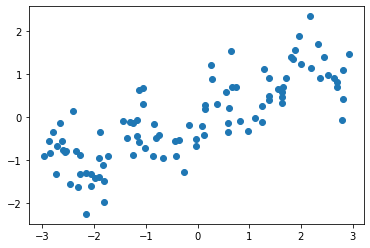

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=100)
plt.scatter(X,y)

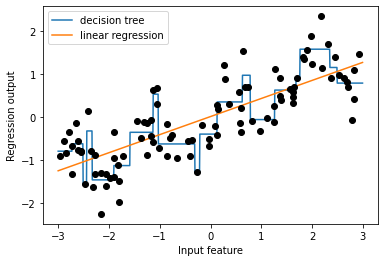

In [17]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1) # endpoint of interval [-3,3] excluded, reshape to a an array <n*1>

# Decision Tree prediction
dt = DecisionTreeRegressor(min_samples_split=0.1).fit(X, y)
plt.plot(line, dt.predict(line), label="decision tree")

# Linear Regression prediction
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

# Original Points
plt.plot(X[:, 0], y, 'o', c='k')

plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [18]:
# 1. define equal-width bins 
bins = np.linspace(-3, 3, 11) 
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


We record for each data point which bin it falls into.

In [19]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did is: transform the *continuous input feature* into *categorical feature* that **encodes which bin a data point is in**. Successively, in order to use a scikit-learn model on this data, we transform this discrete feature to a one-hot encoding. To do this we use the `OneHotEncoder`, becuase the `pandas.get_dummies` only works on categorical variables.

In [20]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False) #returns an array, instead of a sparse matrixx

# encoder.fit finds the unique values that appear in which_bin 
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin) 
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Because we specified 10 bins, the transformed dataset `X_binned` now is made up of 10 features

In [21]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Now we build a new linear regression model and a new decision tree model on the one-hot-encoded data. The result is visualized below, together with the bin boundaries, shown as dotted black lines

Text(0.5, 0, 'Input feature')

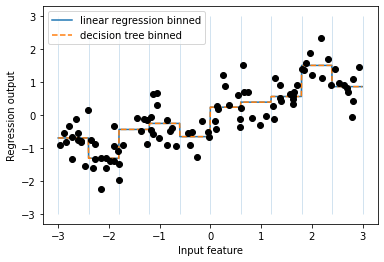

In [22]:
# digitize the impute data we want to predict
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned),'--', label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

#### Alternatives: Equal Width and Equal Frequency Discretization

In [23]:
# 1. Equal Width
from feature_engine.discretisation import EqualWidthDiscretiser
discretizer = EqualWidthDiscretiser(bins=10, variables = ['var1', 'var2'])
discretizer.fit(X_train)

# transform the data
train_t= disc.transform(X_train)

ModuleNotFoundError: No module named 'feature_engine'

In [ ]:
# 2. Equal Width
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discretizer.fit(X_train)

# transform the data
train_t= disc.transform(X_train)

In [ ]:
# 3. Equal Frequency
from feature_engine.discretisers import EqualFrequencyDiscretiser
discretizer = EqualFrequencyDiscretiser(q=10, variables = ['var1', 'var2']) # q = number of bins (or number of quantiles)
discretizer.fit(X_train)

# transform the data
train_t= disc.transform(X_train)

## Interactions and Polynomials
In the discretization example above, the linear model learned a constant value for each bin in the wave dataset. We know, however, that linear models can learn not only **offsets**, but also **slopes**. One way to add a slope to the linear model on the binned data is to add the original feature (the x-axis in the plot) back in. This leads to an *11-dimensional dataset*.

In [24]:
X_combined = np.hstack([X, X_binned]) 
print(X_combined.shape)

(100, 11)


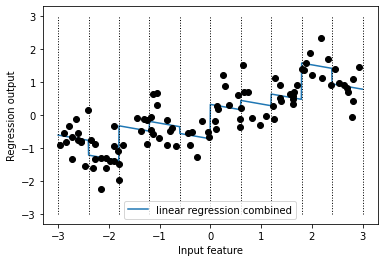

In [25]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined') 

for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) ## plotting vertical lines - bins

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')


### Interactions (or Product)
We would rather have a separate slope for each bin! We can achieve this by adding an **interaction** or `product feature` that *indicates which bin a data point is in and where it lies on the x-axis*. This feature is a product of the bin indicator and the original feature. 

In [26]:
X_product = np.hstack([X_binned, X * X_binned])  ## PRODUCT FEATURE
print(X_product.shape)

(100, 20)


In [27]:
display(X_product[:3,:])

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ]])

The dataset now has 20 features: 
* (10 features) the indicators for which bin a data point is in, and 
* (10 features) a product of the original feature and the bin indicator. 

You can think of the product feature as a separate copy of the x-axis feature for each bin. It is the original feature within the bin, and zero everywhere else. 

Below we see the result of the linear model on this new representation.

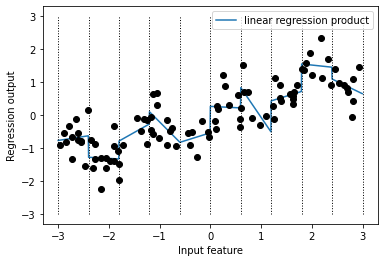

In [28]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product') 

for bin in bins:
  plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) #plotting vertical lines

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


Now each bin has its own offset and slope in this model.

### Polinomials
Using binning is one way to expand a continuous feature. Another one is to use **polynomials** of the original features. For a given feature x, we might want to consider `x ** 2`, `x ** 3`, `x ** 4`, and so on. 

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1 

poly = PolynomialFeatures(degree=10, include_bias=False) 
poly.fit(X)
X_poly = poly.transform(X)

Using a degree of 10 yields 10 features.

In [30]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [31]:
# Let’s compare the entries of X_poly to those of X
print("Entries of X:\n{}".format(X[:5])) 
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [32]:
# let's print the semantics of the features
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


!!! Some of the values can get extreme. The second row has entries above 20000, 3 orders of magnitude different from the rest.

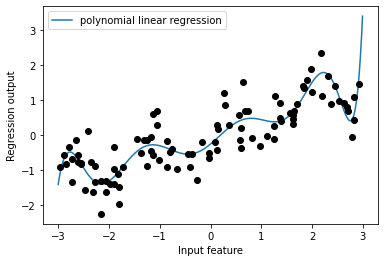

In [33]:
# polynomial regression (linear regression with polynomial features)
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

## Features Transformation

In [34]:
## Login count syntetic data generation

import numpy as np 

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=1000) # mean=0, std=1 by default, size=output shape
X = rnd.poisson(10 * np.exp(X_org))

In [35]:
X.shape

(1000,)

In [36]:
print("Number of feature appearances:\n{}".format(np.bincount(X)))

Number of feature appearances:
[29 42 51 50 72 69 45 60 55 36 33 36 37 32 26 20 23 12 16 17 25 13 10 13
  6 12  7  8  8  9  8  1  4  6  9  3  2  4  4  2  4  3  8  1  3  5  1  0
  1  2  0  2  0  1  4  3  3  3  1  2  0  3  0  2  2  2  1  0  1  2  0  1
  1  1  1  0  0  1  1  0  0  0  0  0  0  1  2  1  1  1  0  0  0  0  1  1
  0  0  1  1  0  0  0  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

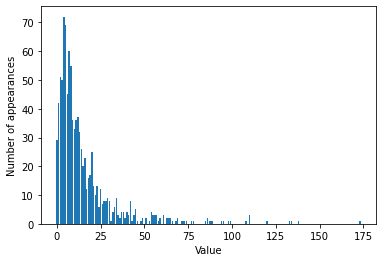

In [37]:
import matplotlib.pyplot as plt

bins = np.bincount(X)
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [38]:
# log transform

X_log = np.log(X + 1)

Text(0.5, 0, 'Value')

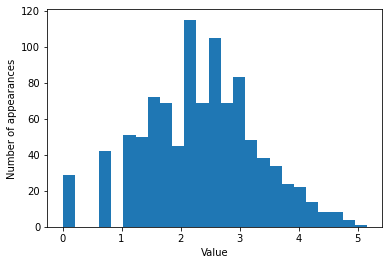

In [39]:
plt.hist(X_log, bins=25)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

## Automatic Features Selection

### Univariate Features Selection

To use univariate feature selection in scikit-learn, you need to choose:
* a *test*, usually either `f_classif` for classification (ANOVA F-value between label/feature) or `f_regression` for regression (F-value between label/feature), and 
* a method to discard features based on the `p-values` determined in the test.

All methods for discarding parameters use a threshold to discard all features with too high a p-value (which means they are unlikely to be related to the target). The methods differ in how they compute this threshold:
* the simplest ones is `SelectKBest`, which selects a fixed number `k` of features
* `SelectPercentile`, which selects a fixed percentage of features. 

Let’s apply the feature selection for classification on the cancer dataset. To make the task a bit harder, we’ll add some noninformative noise features to the data. We expect the feature selection to be able to identify the features that are noninformative and remove them.

In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile 
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
# add noise features to the data
noise = rng.normal(size=(len(cancer.data), 50))

# the first 30 features are from the dataset, the next 50 are noise 
X_w_noise = np.hstack([cancer.data, noise])


#### Percentile

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train)

# transform train set
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


As you can see, the number of features was reduced from 80 to 40 (50% of the original number of features). We can find out which features have been selected using the `get_support` method, which returns a Boolean mask of the selected features.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

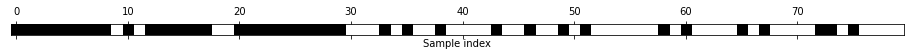

In [42]:
mask = select.get_support()

print(mask)

# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())


As you can see from the visualization of the mask, most of the selected features are the original features, and most of the noise features were removed. However, the recovery of the original features is not perfect. 

#### Selecting the k best
We select the best features based on univariate statistical tests. For example we can use statistical tests to select the features which have the highest correlation to the target feature.

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# select the k best features based on ANOVA F-value between label/feature (classification tasks)
# ANOVA F-value tells us if the tuple of variables (label-feature) are jointly significant.
k_best = SelectKBest(k=40) #Select features according to the k highest scores (40 is specified to be consistent with the previous example)

fit = k_best.fit(X_train, y_train)

# transform training set
X_train_selected = k_best.transform(X_train)
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

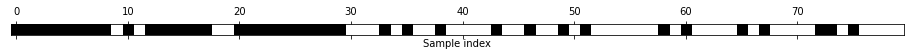

In [44]:
mask = k_best.get_support()
print(mask)
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())


### Model based Selection

In [45]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

The `SelectFromModel` class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided `threshold`. To get a comparable result to what we got with univariate feature selection, we used the `median` as a threshold, so that half of the features will be selected. 

In [46]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 
print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], [])

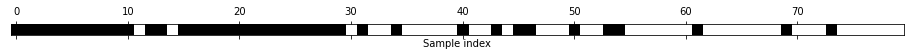

In [47]:
mask = select.get_support()
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())

This time, all but two of the original features were selected. Because we specified to select 40 features, some of the noise features are also selected. 

### Iterative Features Selection

[Source: *Sklearn doc*] RFE select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

([], [])

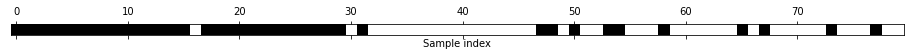

In [48]:
from sklearn.feature_selection import RFE
# RFE=Feature ranking with recursive feature elimination.

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support() #mask of selected features
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")
plt.yticks(())

The feature selection got better compared to the univariate and model-based selection, but one feature was still missed. Running this code also takes significantly longer than that for the model-based selection, because a random forest model is trained 40 times, once for each feature that is dropped.

# PRACTICING on Adult Dataset
For this practical exercise we will use the dataset of adult incomes in the United States, derived from the 1994 census database. The task of the adult dataset is to predict whether a worker has an income of over *50.000 USD* or under *50.000 USD*. The features in this dataset include the workers’ ages, how they are employed (self employed, private industry employee, government employee, etc.), their education, their gender, their working hours per week, occupation, and more.

The dataset is available for download at the following link https://archive.ics.uci.edu/ml/datasets/adult (documentation about the dataset is also available).

The same dataset is also available on `mglearn` `adult.data`


### TASKS.
#### 1. Verify the content of the dataset and the features which might need an encoding (let's imagine we are going to train a linear model, our target is the income). Perform appropriate encoding on the dataset.
#### 2. Verify the distribution of the continuous variables and perform transformation if needed. Check the distribution of the transformed variable.
#### 3. Discretize the continuous variables
#### 4. Increase the dimentionality of the dataset introducing Interactions or Polinomials (continuous variables)
#### 5. Perform Automatic Features Selection and visualize the Features which have been selected, comparing different methodologies.

In [49]:
# from google.colab import files
# uploaded = files.upload()

In [50]:
import io
import pandas as pd
import numpy as np
import mglearn
import os
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(adult_path, header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'sex',  'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                          'income'])
display(data.head())

,age,workclass,fnlwgt,education,sex,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [51]:
# we can work on a subset of columns.
data.columns
data = data[['age', 'workclass', 'education', 'occupation', 'sex','hours-per-week', 'income']]

In [52]:
print(data.sex.value_counts())

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: sex, dtype: int64


In [53]:
print(data.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
